In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("hf://datasets/maharshipandya/spotify-tracks-dataset/dataset.csv")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


# **Stage 1: Data Cleaning**

In [ ]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [ ]:
df.head(20)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,...,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,...,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,...,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,...,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,...,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


In [ ]:
#Data Checking
df.sample(20)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
53651,53651,49X0LAl6faAusYq02PRAY6,Modjo,Modjo (Remastered),Lady - Hear Me Tonight,78,307153,False,0.720,0.808,...,-5.627,1,0.0379,0.00793,0.029300,0.0634,0.8690,126.041,4,house
69792,69792,1QchiD6sdsjMn4r72a2BOb,Aromal Chekaver,Hope,Kaattu,3,129218,False,0.632,0.190,...,-10.629,1,0.0600,0.94400,0.000000,0.1180,0.5120,114.920,4,malay
78696,78696,29Z2xemtVffTwCu58AZ7B0,Fäaschtbänkler;Morgen Freimann;Luke K,Konfetti (Morgen Freimann & Luke K Remix),Konfetti - Morgen Freimann & Luke K Remix,26,153547,False,0.733,0.858,...,-6.042,1,0.1840,0.06880,0.000002,0.1620,0.6160,127.913,4,party
29012,29012,2CgOd0Lj5MuvOqzqdaAXtS,Porter Robinson;Madeon,Shelter,Shelter,66,218964,False,0.276,0.796,...,-4.499,1,0.0579,0.00293,0.000000,0.1840,0.2600,199.526,4,dubstep
89084,89084,3PDf2Xk2fHt3EexYRrVS0j,J Balvin,Perreo Tenebroso Vol. 5,Ahora,0,254906,False,0.810,0.784,...,-3.223,0,0.0622,0.08740,0.000166,0.0830,0.8170,88.001,4,reggaeton
96371,96371,77lxyYpHWVYZAJsO8ybteg,RDN;Suel;Ferrugem,"RDN & Amigos, Vol. 1",Nosso Lance,41,94891,False,0.697,0.462,...,-10.463,1,0.0458,0.27100,0.000000,0.1980,0.6770,172.017,4,samba
17854,17854,520lZsDzgWcQz5qpt3nFIk,gosha,Чернобыль,Чернобыль,38,240000,False,0.761,0.843,...,-1.831,1,0.1450,0.00727,0.200000,0.0755,0.3960,104.971,4,club
40410,40410,0Jonr4Mb95BeP3gVX9KHcS,Gabriela Rocha,Até Transbordar (Ao Vivo),Me Aproximou - Ao Vivo,42,316013,False,0.345,0.697,...,-6.562,1,0.0376,0.04810,0.000000,0.2660,0.1050,147.876,4,gospel
92013,92013,03MW3H9B2P7tgpvzG3klNI,Chuck Berry,pov: you hear the bells jingle,Run Rudolph Run,0,162897,False,0.647,0.876,...,-5.662,1,0.1850,0.88100,0.000036,0.2600,0.9490,151.925,4,rockabilly
46037,46037,7vbSDKLHWbpjqpWF9r3UUa,De Doelleazen;Henk Wijngaard,Met De Vlam In De Pijp,Met De Vlam In De Pijp,35,180000,False,0.527,0.968,...,-4.635,0,0.0510,0.00670,0.002220,0.2870,0.7400,185.038,4,happy


In [ ]:
df.shape

(114000, 21)

In [ ]:
len(df["track_id"].unique())

89741

In [ ]:
#Check for duplicates (there are duplicates)
duplicate_track_count = df.shape[0] - len(df["track_id"].unique())
print(f"Number of duplicate track IDs: {duplicate_track_count}")


Number of duplicate track IDs: 24259


In [ ]:
track_id_counts = df.groupby('track_id')['track_id'].count()
duplicate_track_ids = track_id_counts[track_id_counts > 1]
print(duplicate_track_ids)



Duplicate rows for track ID: 5SuOikwiRyPMVoIQDJUgSV
        Unnamed: 0                track_id      artists album_name track_name  \
0                0  5SuOikwiRyPMVoIQDJUgSV  Gen Hoshino     Comedy     Comedy   
62102        62102  5SuOikwiRyPMVoIQDJUgSV  Gen Hoshino     Comedy     Comedy   
99152        99152  5SuOikwiRyPMVoIQDJUgSV  Gen Hoshino     Comedy     Comedy   
102151      102151  5SuOikwiRyPMVoIQDJUgSV  Gen Hoshino     Comedy     Comedy   

        popularity  duration_ms  explicit  danceability  energy  ...  \
0               73       230666     False         0.676   0.461  ...   
62102           73       230666     False         0.676   0.461  ...   
99152           73       230666     False         0.676   0.461  ...   
102151          73       230666     False         0.676   0.461  ...   

        loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0         -6.746     0        0.143        0.0322          0.000001     0.358   
62102     -6.746  

In [ ]:
df.select_dtypes('number').describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


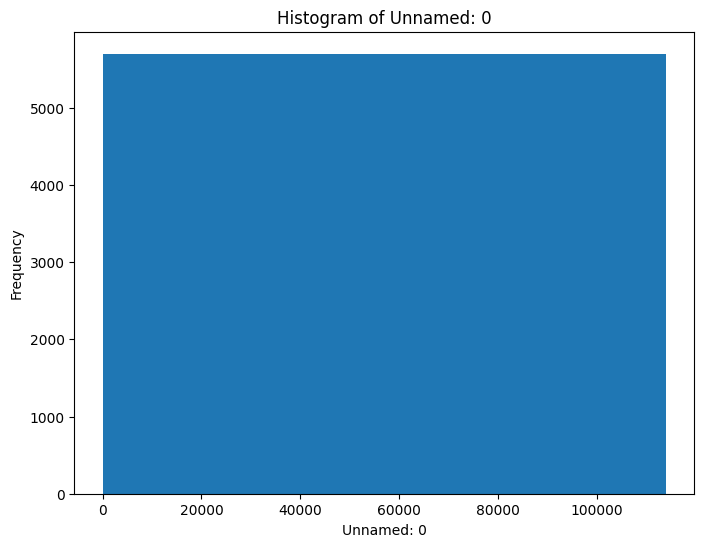

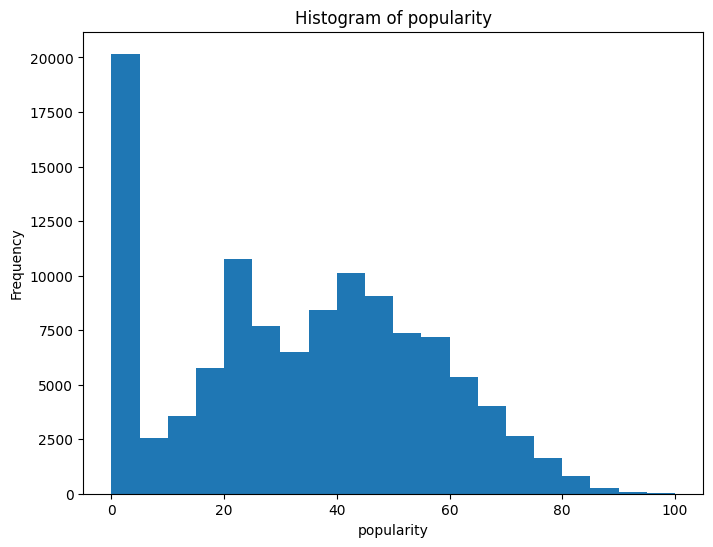

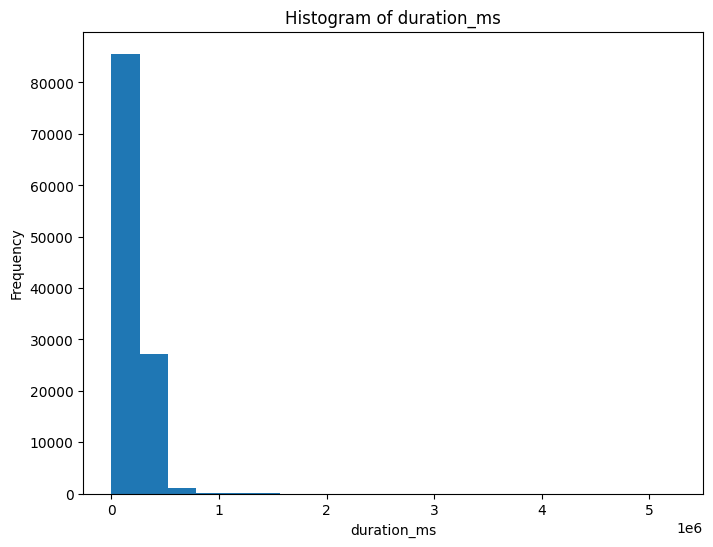

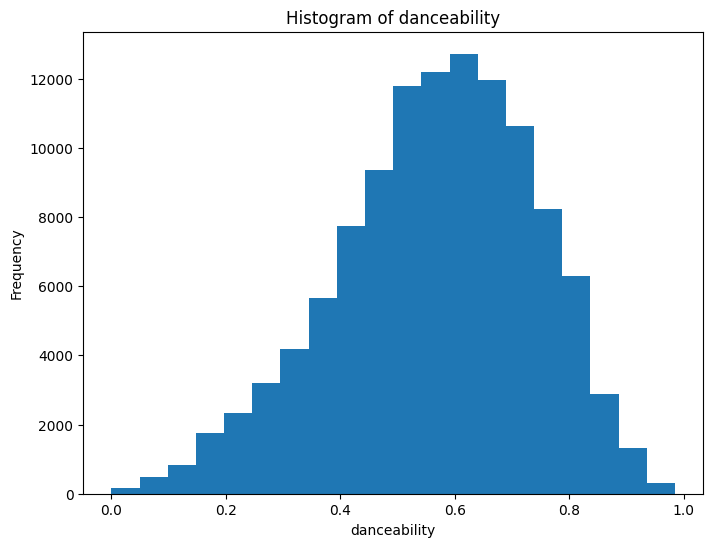

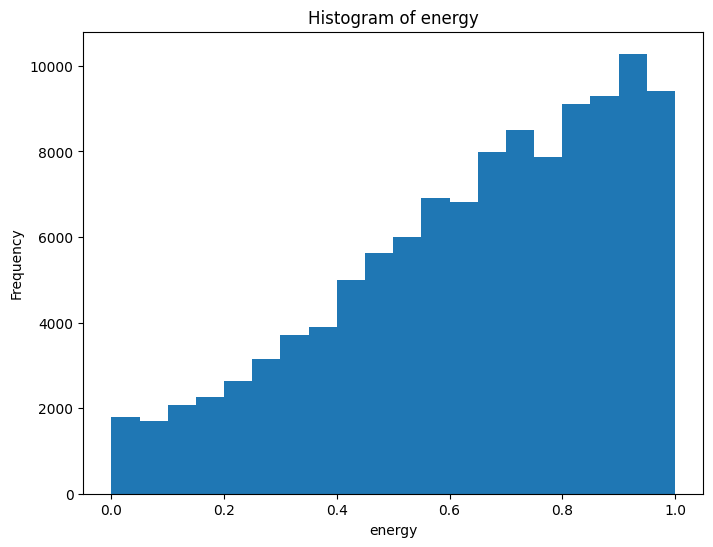

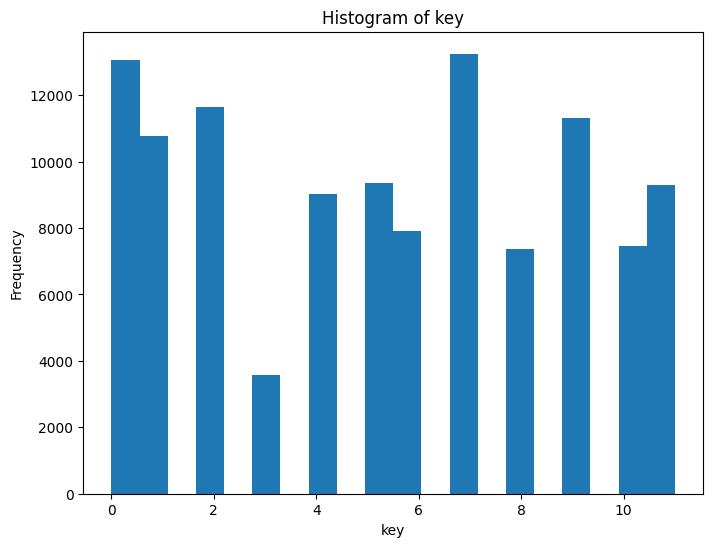

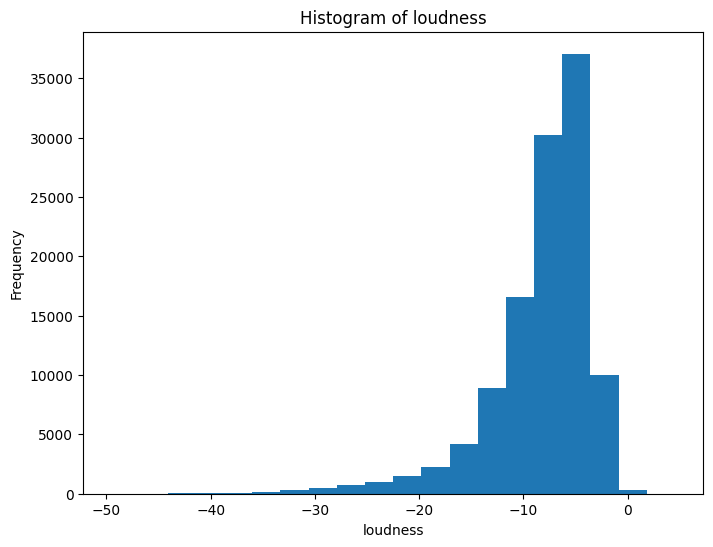

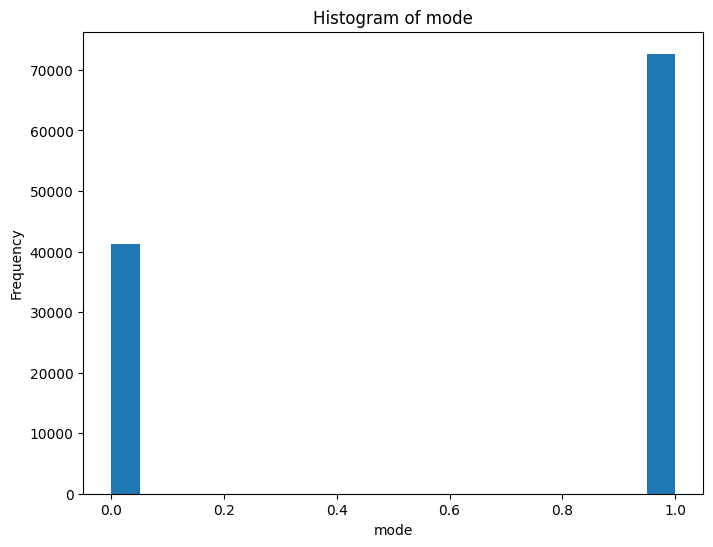

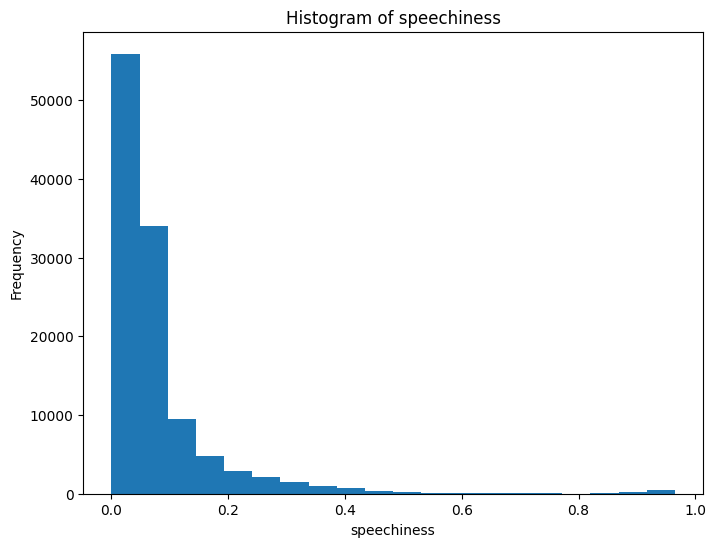

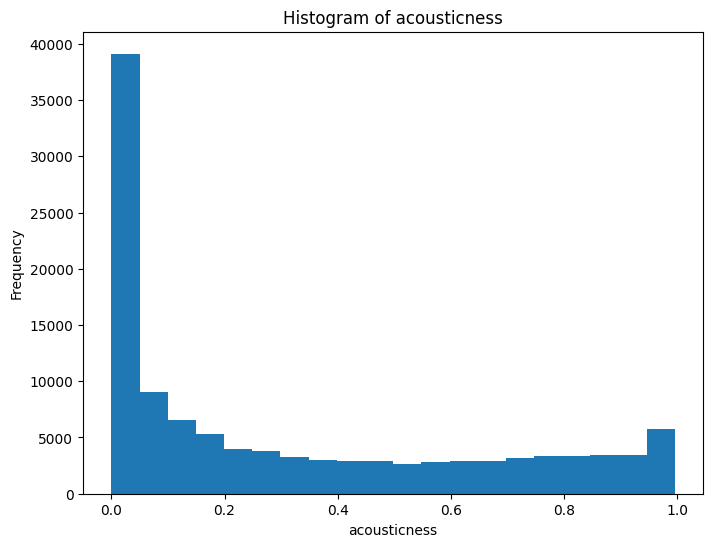

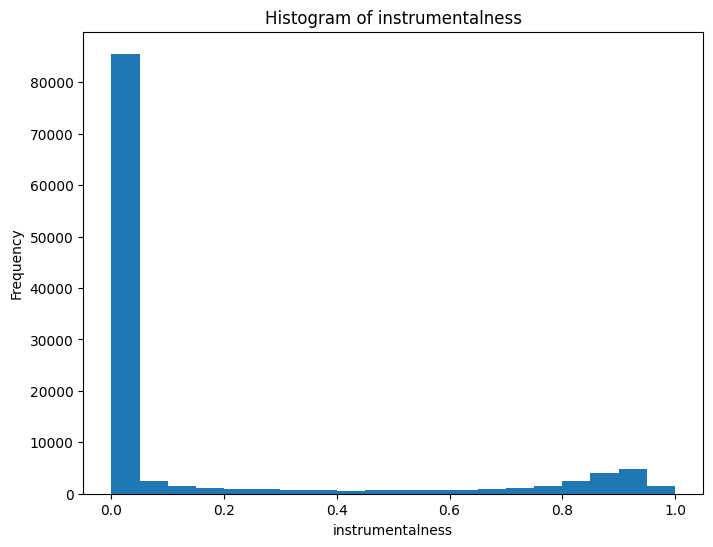

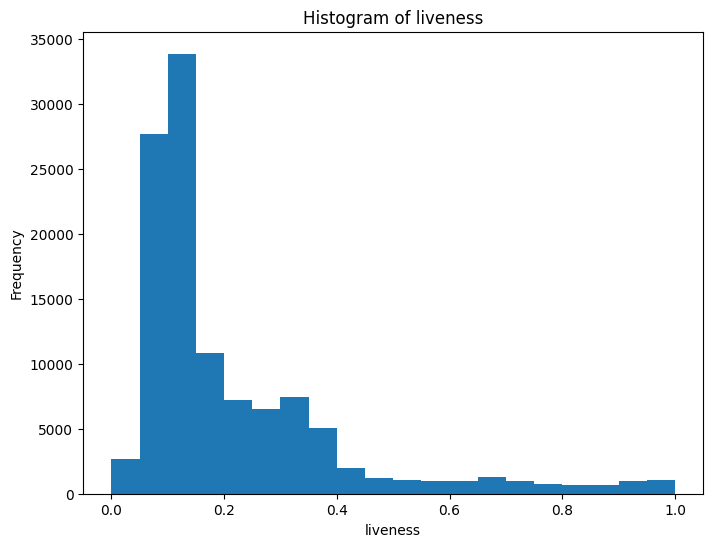

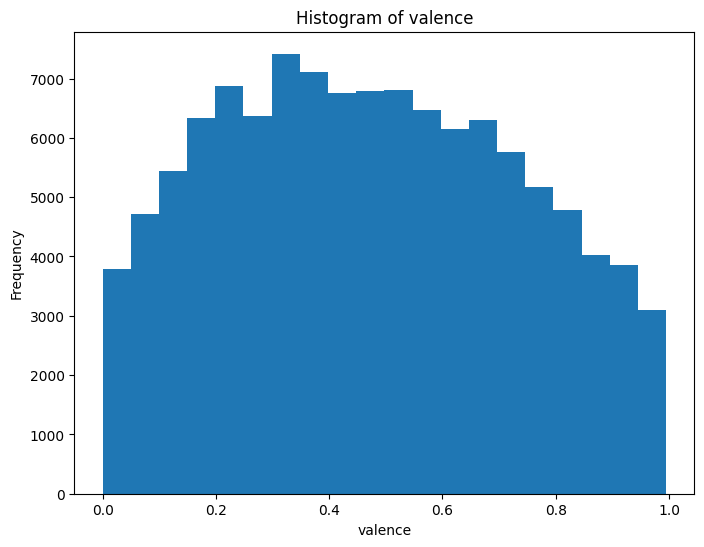

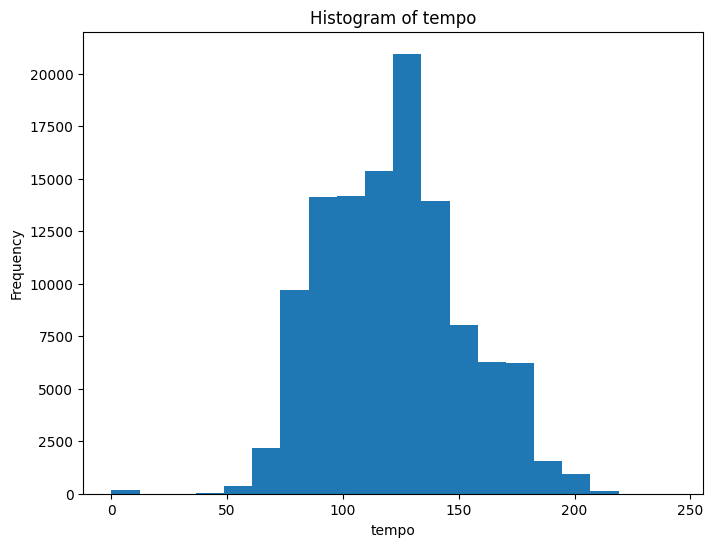

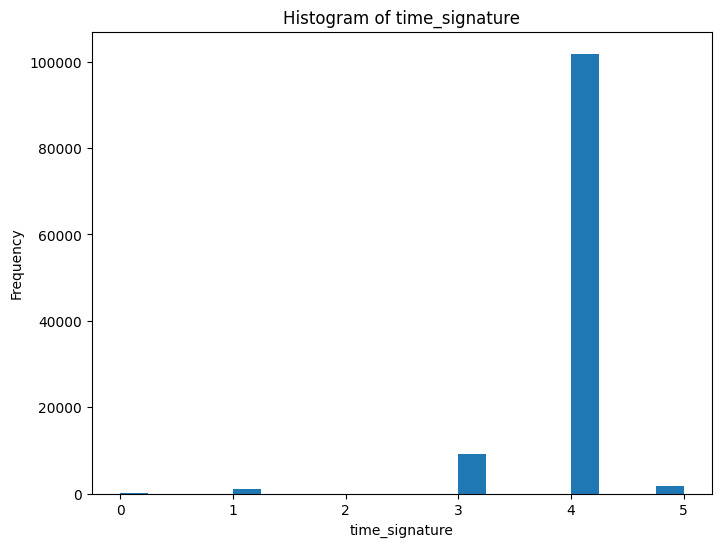

In [ ]:
# Create histograms for numeric variables
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['number'])

# Create histograms for each numeric column
for col in numeric_cols.columns:
  plt.figure(figsize=(8, 6))  # Adjust figure size if needed
  plt.hist(df[col], bins=20)  # You can adjust the number of bins
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.title(f'Histogram of {col}')
  plt.show()


In [ ]:
# Check unique values of categorical variables
categorical_cols = df.select_dtypes(include=['object'])
for col in categorical_cols.columns:
  print(f"Unique values for {col}: {df[col].unique()}")


Unique values for track_id: ['5SuOikwiRyPMVoIQDJUgSV' '4qPNDBW1i3p13qLCt0Ki3A'
 '1iJBSr7s7jYXzM8EGcbK5b' ... '6x8ZfSoqDjuNa5SVP5QjvX'
 '2e6sXL2bYv4bSz6VTdnfLs' '2hETkH7cOfqmz3LqZDHZf5']
Unique values for artists: ['Gen Hoshino' 'Ben Woodward' 'Ingrid Michaelson;ZAYN' ...
 'Cuencos Tibetanos Sonidos Relajantes'
 'Bryan & Katie Torwalt;Brock Human' 'Jesus Culture']
Unique values for album_name: ['Comedy' 'Ghost (Acoustic)' 'To Begin Again' ...
 '#20 Sueños Vividos - Música Intrumental Suave 2018 para Dormir Bien y Relajarse Profundamente'
 'Frecuencias Álmicas en 432hz (Solo Piano)' 'Revelation Songs']
Unique values for track_name: ['Comedy' 'Ghost - Acoustic' 'To Begin Again' ... 'Water Into Light'
 'Miss Perfumado' 'Barbincor']
Unique values for track_genre: ['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime'
 'black-metal' 'bluegrass' 'blues' 'brazil' 'breakbeat' 'british'
 'cantopop' 'chicago-house' 'children' 'chill' 'classical' 'club' 'comedy'
 'country' 'dance' 'danc

In [ ]:
# Find the number of unique genres (should be 125)
unique_genres_count = df['track_genre'].nunique()
print(f"Number of unique genres: {unique_genres_count}")


Number of unique genres: 114


In [4]:
# Find the number of unique modes(should be 2)
unique_mode_count = df['mode'].nunique()
print(f"Number of unique mode: {unique_mode_count}")

Number of unique mode: 2


In [5]:
# Find the number of unique keys(should be 12)
unique_key_count = df['key'].nunique()
print(f"Number of key mode: {unique_key_count}")

Number of key mode: 12


In [ ]:
# Check for missing values in each of the columns
for column in df.columns:
  missing_values = df[column].isnull().sum()
  print(f"'{column}':{missing_values}")


'Unnamed: 0':0
'track_id':0
'artists':1
'album_name':1
'track_name':1
'popularity':0
'duration_ms':0
'explicit':0
'danceability':0
'energy':0
'key':0
'loudness':0
'mode':0
'speechiness':0
'acousticness':0
'instrumentalness':0
'liveness':0
'valence':0
'tempo':0
'time_signature':0
'track_genre':0


In [ ]:
# Find rows with missing values
rows_with_missing_values = df[df.isnull().any(axis=1)]

print(rows_with_missing_values)


       Unnamed: 0                track_id artists album_name track_name  \
65900       65900  1kR4gIb7nGxHPI3D2ifs59     NaN        NaN        NaN   

       popularity  duration_ms  explicit  danceability  energy  ...  loudness  \
65900           0            0     False         0.501   0.583  ...     -9.46   

       mode  speechiness  acousticness  instrumentalness  liveness  valence  \
65900     0       0.0605          0.69           0.00396    0.0747    0.734   

         tempo  time_signature  track_genre  
65900  138.391               4        k-pop  

[1 rows x 21 columns]


In [ ]:
# Look at the data types of each column
print(df.dtypes)


Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object


In [6]:
# Data Cleaning Function
def clean_data(df):
  df = df.drop('Unnamed: 0', axis=1, errors='ignore')
  df = df.dropna()
  return df


In [7]:
cleaned_df = clean_data(df)

In [8]:
# Checking the clean data
cleaned_df.head(10)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,6,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,2,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,11,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,0,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,1,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


In [9]:
cleaned_df.sample(10)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
64179,4RWsVVHr55gPDn1FjeQJNT,Ella Fitzgerald,Beste Weihnachtslieder,Rudolph The Red-Nosed Reindeer,0,171773,False,0.596,0.315,8,-9.175,1,0.0428,0.96100,0.000000,0.2580,0.6400,119.935,4,jazz
55387,22RYOtk4U6OtU2ofTugrL1,Rudra,Tu Jane Na (lofi),Tu Jane Na (lofi),52,318876,False,0.374,0.474,7,-10.080,1,0.0534,0.32800,0.002830,0.3380,0.1440,115.134,4,indian
89287,2d21akUnz6DXYVbkvuJy0r,Jhayco,Perreo Tenebroso Vol. 3,Easy,0,239373,False,0.853,0.777,1,-4.025,0,0.0689,0.09720,0.000501,0.3320,0.5550,94.023,4,reggaeton
12642,6xruR6AwCTiybabrVblEQZ,Andy Hui;Jacky Cheung;鄭中基,甲乙丙丁,甲乙丙丁,20,242533,False,0.809,0.620,8,-10.469,1,0.0538,0.29800,0.000000,0.1440,0.8720,119.994,4,cantopop
50454,2zLq45SWExzz6lf6PRQBbV,VOWWOW,III,SHOT IN THE DARK,23,226266,False,0.162,0.979,9,-3.561,1,0.1150,0.00154,0.496000,0.2940,0.0723,130.165,4,heavy-metal
99070,0ZZT1LS2Y1CkOQqyGTb6tx,Vismay Patel,Dil Mera,Dil Mera,52,232625,False,0.574,0.298,9,-12.637,1,0.0263,0.90200,0.000000,0.1070,0.3010,80.017,4,singer-songwriter
84102,4vpeKl0vMGdAXpZiQB2Dtd,Jefferson Airplane,Surrealistic Pillow,White Rabbit,72,150640,False,0.551,0.293,2,-12.503,1,0.0272,0.48600,0.000273,0.0864,0.3220,106.798,4,psych-rock
8266,5MMnwYs0hIxkENRsbkWJ2G,Deep Purple,Machine Head (Remastered),Smoke On The Water - Remastered 2012,73,340742,False,0.598,0.676,0,-9.211,1,0.0279,0.13000,0.225000,0.1120,0.8050,114.169,4,blues
61714,5NsHc3E7ZRPH4Y6rlLDusw,AKB48,前しか向かねえ<劇場盤>,前しか向かねえ,19,260093,False,0.538,0.978,0,-2.039,1,0.0550,0.06100,0.000000,0.0873,0.6990,107.516,4,j-idol
74199,18wdzUDXJyfXU0TmI9ePvy,Zé Ramalho,Zé Ramalho Ao Vivo 2005,Garoto de Aluguel (Taxi Boy) [Ao Vivo],45,296960,False,0.551,0.835,6,-8.013,0,0.0366,0.00599,0.000124,0.9210,0.4320,96.238,4,mpb


In [10]:
cleaned_df.shape

(113999, 20)

In [ ]:
#Save clean df to colab for future use
cleaned_df.to_csv('clean_spotify_data.csv', index=False)

# Stage 2: Exploratory Data Analysis

In [11]:
# Calculate summary statistics for numeric columns
summary_stats = cleaned_df.describe()
print(summary_stats)

          popularity   duration_ms   danceability         energy  \
count  113999.000000  1.139990e+05  113999.000000  113999.000000   
mean       33.238827  2.280312e+05       0.566801       0.641383   
std        22.304959  1.072961e+05       0.173543       0.251530   
min         0.000000  8.586000e+03       0.000000       0.000000   
25%        17.000000  1.740660e+05       0.456000       0.472000   
50%        35.000000  2.129060e+05       0.580000       0.685000   
75%        50.000000  2.615060e+05       0.695000       0.854000   
max       100.000000  5.237295e+06       0.985000       1.000000   

                 key       loudness           mode    speechiness  \
count  113999.000000  113999.000000  113999.000000  113999.000000   
mean        5.309126      -8.258950       0.637558       0.084652   
std         3.559999       5.029357       0.480708       0.105733   
min         0.000000     -49.531000       0.000000       0.000000   
25%         2.000000     -10.013000       

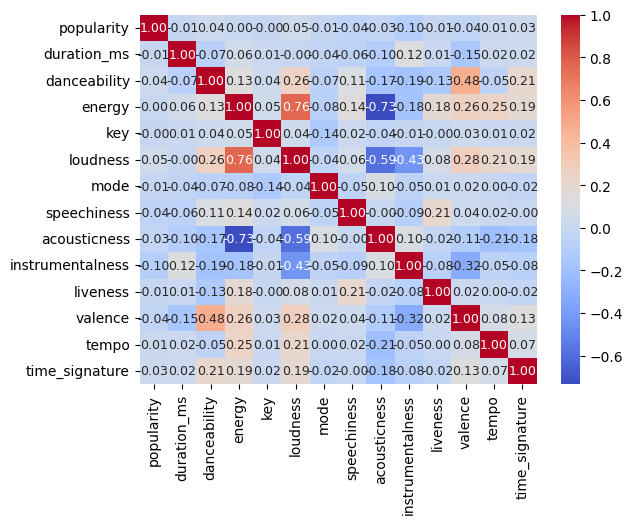

In [17]:
# Correlation matrix
numeric_cols = cleaned_df.select_dtypes(include=['number'])
# Calculate correlation matrix
corr_matrix = numeric_cols.corr()

# Visualize with a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',fmt=".2f",annot_kws={"size": 9})
plt.show()

In [ ]:
# Scatter Plots


In [ ]:
# Categorical Variables against Numerical